## Introduction

This notebook explores the task of predicting the score of answers to coding questions using natural language processing (NLP) techniques and machine learning. We will leverage a dataset of coding answers with associated scores and correctness labels to develop and compare various language models. 

The notebook is structured as follows:

1. **Data Loading and Initial Exploration:** We begin by loading the dataset and performing basic statistical analysis to understand the data distribution and characteristics.
2. **Preprocessing:**  We establish an NLP preprocessing pipeline to clean and prepare the answer text for further analysis. This pipeline will involve techniques such as tokenization, stemming, lemmatization, stop word removal, and discretization. 
3. **Data Encoding:**  We will encode the preprocessed text into numerical representations suitable for machine learning.  Three different encoding techniques will be employed: Word2Vec (CBOW and Skip-Gram), Bag-of-Words, and TF-IDF.
4. **Model Training and Evaluation:** Four different regression models will be trained on the encoded data: Support Vector Regression (SVR), Naive Bayes, Linear Regression, and Decision Tree. The performance of these models will be evaluated using standard metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²), and Explained Variance Score (EVS).
5. **Model Selection and Interpretation:** We will compare the performance of the different models and select the best performing one based on the evaluation metrics.  We will then interpret the results and analyze the model's capabilities in predicting answer scores.

This notebook aims to demonstrate the power of NLP and machine learning in extracting valuable insights from coding-related text data, ultimately leading to improved understanding and prediction of answer quality.


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

## Load Dataset

In [2]:
df = pd.read_csv("Downloads/answers.csv")
df

,id,answer,score,correct
0,1.1,High risk problems are address in the prototyp...,3.5,0.0
1,1.1,To simulate portions of the desired final prod...,5.0,1.0
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0
4,1.1,It is used to let the users have a first idea ...,3.0,0.0
...,...,...,...,...
2437,12.1,log n,5.0,1.0
2438,12.1,minus 1 divided by 2,1.5,0.0
2439,12.1,2n-1,2.5,0.0
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0


## Calculate the statistics of the length of each answer as well as their scores and the average of these two

In [3]:
df["text_length"] = df["answer"].apply(len)
print(df["text_length"].describe())

count    2442.000000
mean      104.473382
std        82.552263
min         1.000000
25%        50.000000
50%        87.000000
75%       140.000000
max       951.000000
Name: text_length, dtype: float64


In [4]:
print(df["score"].describe())

count    2442.000000
mean        4.190571
std         1.112038
min         0.000000
25%         3.500000
50%         5.000000
75%         5.000000
max         5.000000
Name: score, dtype: float64


## Visualize the frequency of scores of the answers in Our data

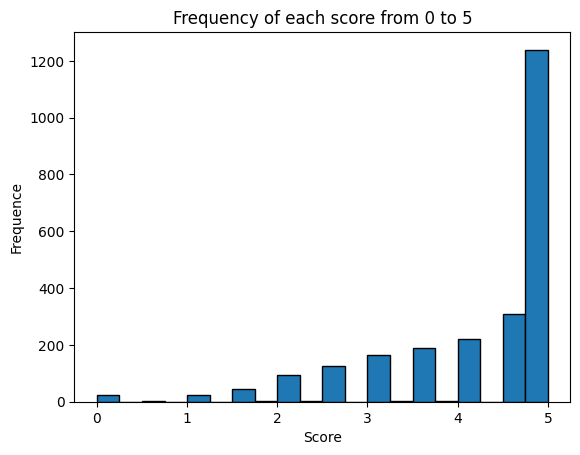

In [5]:
plt.hist(df["score"], bins=20, edgecolor='k')
plt.xlabel("Score")
plt.ylabel("Frequence")
plt.title("Frequency of each score from 0 to 5")
plt.show()

# WordCloud

### We can see the most common words in the answers for each question for example question '1.1', or answers with the id = 1.1

In [6]:
df_id_specific = df[df['id'] == 1.1] # making dataframe of answers to question '1.1'
df_id_specific

,id,answer,score,correct,text_length
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,191
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,202
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,116
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,251
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,229
5,1.1,To find problem and errors in a program before...,2.0,0.0,62
6,1.1,To address major issues in the creation of the...,2.5,0.0,173
7,1.1,you can break the whole program into prototype...,5.0,1.0,94
8,1.1,To provide an example or model of how the fini...,3.5,0.0,211
9,1.1,Simulating the behavior of only a portion of t...,5.0,1.0,74


In [7]:
# to add after
# Calculer la longueur moyenne des réponses pour chaque id
average_length_by_id = df.groupby('id')['text_length'].mean().reset_index()
average_length_by_id.columns = ['id', 'average_answer_length']

# Vérifier les résultats
print(average_length_by_id.head(50))

     id  average_answer_length
0   1.1             132.172414
1   1.2              96.034483
2   1.3             178.103448
3   1.4              28.000000
4   1.5              93.034483
5   1.6             109.758621
6   1.7             180.103448
7   2.1              78.433333
8   2.2             162.366667
9   2.3             138.733333
10  2.4              61.666667
11  2.5              54.500000
12  2.6             182.200000
13  2.7              93.600000
14  3.1              78.548387
15  3.2              71.548387
16  3.3             116.419355
17  3.4             105.516129
18  3.5              87.709677
19  3.6             110.419355
20  3.7             149.741935
21  4.1             126.133333
22  4.2             163.000000
23  4.3              95.233333
24  4.4             147.166667
25  4.5              78.833333
26  4.6              29.133333
27  4.7              36.066667
28  5.1             132.107143
29  5.2             131.785714
30  5.3             105.785714
31  5.4 

In [8]:
# to add after
# Ajouter la longueur moyenne des réponses pour chaque id au DataFrame original
df = pd.merge(df, average_length_by_id, on='id', how='left')
df

,id,answer,score,correct,text_length,average_answer_length
0,1.1,High risk problems are address in the prototyp...,3.5,0.0,191,132.172414
1,1.1,To simulate portions of the desired final prod...,5.0,1.0,202,132.172414
2,1.1,A prototype program simulates the behaviors of...,4.0,1.0,116,132.172414
3,1.1,Defined in the Specification phase a prototype...,5.0,1.0,251,132.172414
4,1.1,It is used to let the users have a first idea ...,3.0,0.0,229,132.172414
...,...,...,...,...,...,...
2437,12.1,log n,5.0,1.0,5,75.053571
2438,12.1,minus 1 divided by 2,1.5,0.0,20,75.053571
2439,12.1,2n-1,2.5,0.0,4,75.053571
2440,12.1,"it takes at most h steps, where h is the heigh...",5.0,1.0,60,75.053571


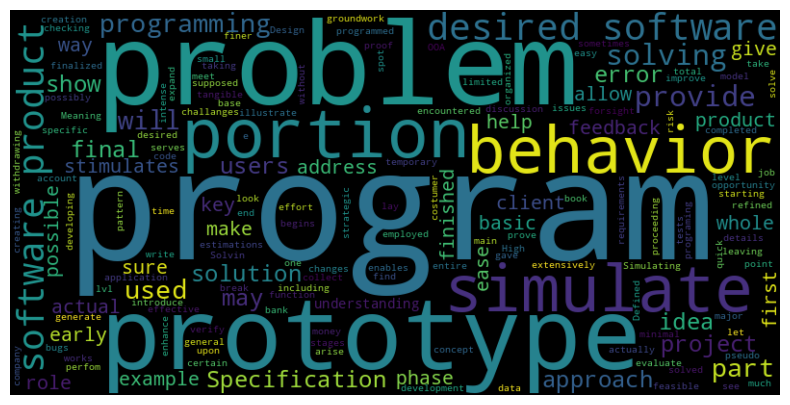

In [9]:
# Concaténer toutes les réponses pour créer un seul texte
all_text = ' '.join(df_id_specific['answer'])

wordcloud = WordCloud(width= 800, height=400, background_color='black').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Now we make a wordcloud for the answers of the chosen question ex 1.1, but only answer which are correct in other words 1.0

In [10]:
id_spec = 1.2
target_spec = 1.0

df_spec = df[(df['id'] == id_spec) & (df['correct'] == target_spec)]

In [11]:
df_spec

,id,answer,score,correct,text_length,average_answer_length
30,1.2,The implementation phase and the maintenance p...,4.0,1.0,63,96.034483
31,1.2,"Verification, coding, refining the solution an...",4.5,1.0,100,96.034483
36,1.2,Refining the solution,4.0,1.0,21,96.034483
38,1.2,Refining and Coding,5.0,1.0,19,96.034483
44,1.2,"Directly: Refining, coding. Because Refining i...",5.0,1.0,241,96.034483
50,1.2,coding and refining,5.0,1.0,19,96.034483


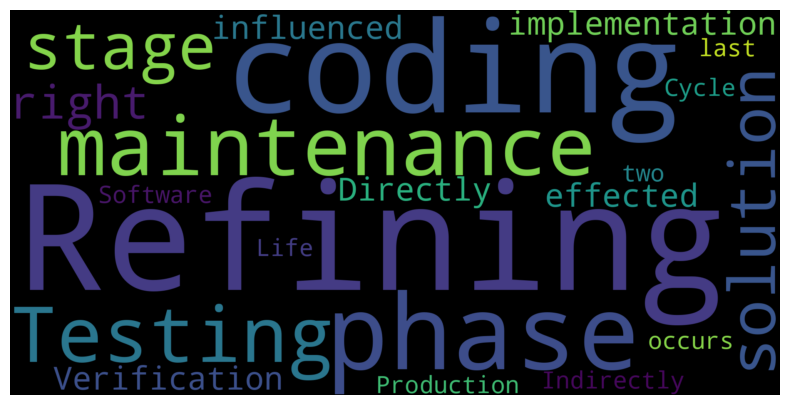

In [12]:
all_text_spec = ' '.join(df_spec['answer'])

wordcloud_spec = WordCloud(width=2000, height= 1000, background_color='black').generate(all_text_spec)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spec, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
print(df.isnull().sum())

id                       0
answer                   0
score                    0
correct                  0
text_length              0
average_answer_length    0
dtype: int64


We check if there are any missing values, and as we see there are none

# Preprocessing

### Concepts Explained

#### 1. Natural Language Processing (NLP)

* **Natural Language Processing (NLP):**  NLP is a field of computer science that deals with the interaction between computers and human language. Its goal is to enable computers to understand, interpret, and generate human language in a way that is meaningful and useful.

* **Tokenization:** The process of breaking down text into smaller units called tokens, usually words or punctuation marks. In the notebook, `RegexpTokenizer` is used to extract words based on a regular expression.

* **Stop Word Removal:**  The process of removing common words that have little semantic meaning (e.g., "the", "a", "is") from the text.  These words often don't contribute to the overall meaning of a sentence and can be removed to simplify the data.

* **Stemming:**  Reducing words to their root form by removing suffixes.  For example, "running" might be stemmed to "run". 

* **Lemmatization:** Similar to stemming but more sophisticated.  It considers the context and morphology of words to reduce them to their base form (lemma), maintaining the correct word form. For example, "running" would be lemmatized to "run" while "better" would remain "better".

* **Discretization:**  Transforming continuous numerical data into categorical data.  In the notebook, we use `pd.cut` to categorize answer lengths and word counts into meaningful categories like "very short", "short", "medium", etc.


### First of all we check for duplicated values

In [14]:
print(df.duplicated().sum())

101


 We see that there are 101 duplicated values on the raw text, but by looking at the answers for the same question, we see that there are mulitple answers duplicated but with different case or with addditional special character or punctuation, so before removing the duplicated values we need to clean the text first.

In [15]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower() # make all text lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub(r'\s+', ' ',text) # remove extra whitespace
    # Tokenize text
    words = text.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    cleaned_text = ' '.join(words)
    return cleaned_text
df["answer"] = df["answer"].apply(clean_text)
df["text_length"] = df["answer"].apply(len)
average_length_by_id = df.groupby('id')['text_length'].mean().reset_index()
average_length_by_id.columns = ['id', 'average_answer_length']

print(df.head(50))


     id                                             answer  score  correct  \
0   1.1  high risk problems address prototype program m...    3.5      0.0   
1   1.1  simulate portions desired final product quick ...    5.0      1.0   
2   1.1  prototype program simulates behaviors portions...    4.0      1.0   
3   1.1  defined specification phase prototype stimulat...    5.0      1.0   
4   1.1  used let users first idea completed program al...    3.0      0.0   
5   1.1              find problem errors program finalized    2.0      0.0   
6   1.1  address major issues creation program way acco...    2.5      0.0   
7   1.1  break whole program prototype programs simulat...    5.0      1.0   
8   1.1  provide example model finished program perfom ...    3.5      0.0   
9   1.1  simulating behavior portion desired software p...    5.0      1.0   
10  1.1  program stimulates behavior portions desired s...    5.0      1.0   
11  1.1  program simulates behavior portions desired so...    5.

## Visualize Duplicates to see if they should be deleted

In [16]:
dfd = df["answer"]
dfd  = df[dfd.isin(dfd[dfd.duplicated()])].sort_values("answer")
dfd.tail(25)

,id,answer,score,correct,text_length,average_answer_length
783,4.6,runtime error,5.0,1.0,13,29.133333
795,4.6,runtime error,5.0,1.0,13,29.133333
797,4.6,runtime error,5.0,1.0,13,29.133333
799,4.6,runtime error,5.0,1.0,13,29.133333
800,4.6,runtime error,5.0,1.0,13,29.133333
809,4.6,runtime error,5.0,1.0,13,29.133333
801,4.6,runtime error,5.0,1.0,13,29.133333
803,4.6,runtime error,5.0,1.0,13,29.133333
786,4.6,runtime error,5.0,1.0,13,29.133333
805,4.6,runtime error,5.0,1.0,13,29.133333


## We conclude that duplicated rows in the "answer" column could be dropped as they have the same scores so they don't hold any weight

In [17]:
df.drop_duplicates(keep='first',inplace=True)
df

,id,answer,score,correct,text_length,average_answer_length
0,1.1,high risk problems address prototype program m...,3.5,0.0,137,132.172414
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414
4,1.1,used let users first idea completed program al...,3.0,0.0,165,132.172414
...,...,...,...,...,...,...
2436,12.1,three steps visit root node go right subtree v...,2.5,0.0,86,75.053571
2438,12.1,minus 1 divided 2,1.5,0.0,17,75.053571
2439,12.1,2n1,2.5,0.0,3,75.053571
2440,12.1,takes h steps h height tree,5.0,1.0,27,75.053571


In [18]:
df['answer'].nunique()
# of distinct values in a column.

2192

In [19]:
dfd  = df[dfd.isin(dfd[dfd.duplicated()])].sort_values("answer")
dff = df["answer"]
dff= df[dff.isin(dff[dff.value_counts()])]
dff

,id,answer,score,correct,text_length,average_answer_length
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414
5,1.1,find problem errors program finalized,2.0,0.0,37,132.172414
13,1.1,simulate problem solving parts problem,4.5,1.0,38,132.172414


In [20]:
df['answer'].value_counts()

answer
answered                                                                                                                              13
                                                                                                                                       5
return type input parameters                                                                                                           3
onlogn                                                                                                                                 3
pop push                                                                                                                               3
                                                                                                                                      ..
insertion sort divides list sorted unsorted regions takes item unsorted region inserts correct order sorted region                     1
takes element array compares next 

In [21]:
df = df[df['answer'] != 'not answered']
df

,id,answer,score,correct,text_length,average_answer_length
0,1.1,high risk problems address prototype program m...,3.5,0.0,137,132.172414
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414
4,1.1,used let users first idea completed program al...,3.0,0.0,165,132.172414
...,...,...,...,...,...,...
2436,12.1,three steps visit root node go right subtree v...,2.5,0.0,86,75.053571
2438,12.1,minus 1 divided 2,1.5,0.0,17,75.053571
2439,12.1,2n1,2.5,0.0,3,75.053571
2440,12.1,takes h steps h height tree,5.0,1.0,27,75.053571


In [22]:
df['answer'].value_counts()

answer
answered                                                                                                                              13
                                                                                                                                       5
return type input parameters                                                                                                           3
onlogn                                                                                                                                 3
pop push                                                                                                                               3
                                                                                                                                      ..
insertion sort divides list sorted unsorted regions takes item unsorted region inserts correct order sorted region                     1
takes element array compares next 

In [23]:
df = df[df['answer'] != 'no answer']
df

,id,answer,score,correct,text_length,average_answer_length
0,1.1,high risk problems address prototype program m...,3.5,0.0,137,132.172414
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414
4,1.1,used let users first idea completed program al...,3.0,0.0,165,132.172414
...,...,...,...,...,...,...
2436,12.1,three steps visit root node go right subtree v...,2.5,0.0,86,75.053571
2438,12.1,minus 1 divided 2,1.5,0.0,17,75.053571
2439,12.1,2n1,2.5,0.0,3,75.053571
2440,12.1,takes h steps h height tree,5.0,1.0,27,75.053571


## Tokenization with RegexpTokenizer

In [24]:
tokenizer = RegexpTokenizer(r"\b[a-zA-Z']+\b") # \b : Marque le début d'un mot (boundary)./ [a-zA-Z']+ : Capture une séquence de caractères alphabétiques (majuscules et minuscules) et d'apostrophes. / \b : Marque la fin d'un mot (boundary).
text = ' '.join(df['answer'])
tokens = tokenizer.tokenize(text)
tokens

['high',
 'risk',
 'problems',
 'address',
 'prototype',
 'program',
 'make',
 'sure',
 'program',
 'feasible',
 'prototype',
 'may',
 'also',
 'used',
 'show',
 'company',
 'software',
 'possibly',
 'programmed',
 'simulate',
 'portions',
 'desired',
 'final',
 'product',
 'quick',
 'easy',
 'program',
 'small',
 'specific',
 'job',
 'way',
 'help',
 'see',
 'problem',
 'may',
 'solve',
 'final',
 'project',
 'prototype',
 'program',
 'simulates',
 'behaviors',
 'portions',
 'desired',
 'software',
 'product',
 'allow',
 'error',
 'checking',
 'defined',
 'specification',
 'phase',
 'prototype',
 'stimulates',
 'behavior',
 'portions',
 'desired',
 'software',
 'product',
 'meaning',
 'role',
 'prototype',
 'temporary',
 'solution',
 'program',
 'refined',
 'used',
 'extensively',
 'problem',
 'solving',
 'used',
 'let',
 'users',
 'first',
 'idea',
 'completed',
 'program',
 'allow',
 'clients',
 'evaluate',
 'program',
 'generate',
 'much',
 'feedback',
 'including',
 'software',
 '

In [25]:
stop_words = set(stopwords.words('english'))

tokens = [word for word in tokens if word not in stop_words]
tokens

['high',
 'risk',
 'problems',
 'address',
 'prototype',
 'program',
 'make',
 'sure',
 'program',
 'feasible',
 'prototype',
 'may',
 'also',
 'used',
 'show',
 'company',
 'software',
 'possibly',
 'programmed',
 'simulate',
 'portions',
 'desired',
 'final',
 'product',
 'quick',
 'easy',
 'program',
 'small',
 'specific',
 'job',
 'way',
 'help',
 'see',
 'problem',
 'may',
 'solve',
 'final',
 'project',
 'prototype',
 'program',
 'simulates',
 'behaviors',
 'portions',
 'desired',
 'software',
 'product',
 'allow',
 'error',
 'checking',
 'defined',
 'specification',
 'phase',
 'prototype',
 'stimulates',
 'behavior',
 'portions',
 'desired',
 'software',
 'product',
 'meaning',
 'role',
 'prototype',
 'temporary',
 'solution',
 'program',
 'refined',
 'used',
 'extensively',
 'problem',
 'solving',
 'used',
 'let',
 'users',
 'first',
 'idea',
 'completed',
 'program',
 'allow',
 'clients',
 'evaluate',
 'program',
 'generate',
 'much',
 'feedback',
 'including',
 'software',
 '

In [26]:

# Groupe answers by id
grouped_answers = df.groupby('id')['answer'].apply(list).to_dict()

# Initialiser les objets nécessaires
tokenizer = RegexpTokenizer(r"\b[a-zA-Z']+\b")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenizer
    tokens = tokenizer.tokenize(text)
    # delete stop words and lemmetizing
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Preprocess each group
preprocessed_corpora = {id_: [preprocess_text(answer) for answer in answers] for id_, answers in grouped_answers.items()}

# verify preprocessing for the groupe '1.1'
print(preprocessed_corpora[1.1])  


[['high', 'risk', 'problem', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed'], ['simulate', 'portion', 'desired', 'final', 'product', 'quick', 'easy', 'program', 'small', 'specific', 'job', 'way', 'help', 'see', 'problem', 'may', 'solve', 'final', 'project'], ['prototype', 'program', 'simulates', 'behavior', 'portion', 'desired', 'software', 'product', 'allow', 'error', 'checking'], ['defined', 'specification', 'phase', 'prototype', 'stimulates', 'behavior', 'portion', 'desired', 'software', 'product', 'meaning', 'role', 'prototype', 'temporary', 'solution', 'program', 'refined', 'used', 'extensively', 'problem', 'solving'], ['used', 'let', 'user', 'first', 'idea', 'completed', 'program', 'allow', 'client', 'evaluate', 'program', 'generate', 'much', 'feedback', 'including', 'software', 'specification', 'project', 'estimation', 'total', 'project'], ['find', 'problem', 'e

## Now we create a corpus for all the answers to the same questions, which have the same id 

In [27]:
# Initialiser les objets nécessaires
tokenizer = RegexpTokenizer(r"\b[a-zA-Z']+\b")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokeniser
    tokens = tokenizer.tokenize(text)
    # Supprimer les stop words et lemmatiser
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return tokens

# Dictionnaire pour stocker les corpus par ID
corpora_by_id = {}

# Passer par toutes les réponses et créer un corpus pour chaque ID
for idx, row in df.iterrows():
    answer_id = row['id']
    answer_text = row['answer']
    preprocessed_tokens = preprocess_text(answer_text)
    
    # Ajouter les tokens au corpus correspondant à l'ID
    if answer_id in corpora_by_id:
        corpora_by_id[answer_id].extend(preprocessed_tokens)
    else:
        corpora_by_id[answer_id] = preprocessed_tokens

# Afficher les corpus pour tous les ID
for id_, tokens in corpora_by_id.items():
    print(f'Corpus for ID {id_}:')
    print(tokens)  # Afficher les tokens de chaque corpus
    print()


Corpus for ID 1.1:
['high', 'risk', 'problem', 'address', 'prototype', 'program', 'make', 'sure', 'program', 'feasible', 'prototype', 'may', 'also', 'used', 'show', 'company', 'software', 'possibly', 'programmed', 'simulate', 'portion', 'desired', 'final', 'product', 'quick', 'easy', 'program', 'small', 'specific', 'job', 'way', 'help', 'see', 'problem', 'may', 'solve', 'final', 'project', 'prototype', 'program', 'simulates', 'behavior', 'portion', 'desired', 'software', 'product', 'allow', 'error', 'checking', 'defined', 'specification', 'phase', 'prototype', 'stimulates', 'behavior', 'portion', 'desired', 'software', 'product', 'meaning', 'role', 'prototype', 'temporary', 'solution', 'program', 'refined', 'used', 'extensively', 'problem', 'solving', 'used', 'let', 'user', 'first', 'idea', 'completed', 'program', 'allow', 'client', 'evaluate', 'program', 'generate', 'much', 'feedback', 'including', 'software', 'specification', 'project', 'estimation', 'total', 'project', 'find', 'prob

## Discretization of data

In [28]:
df

,id,answer,score,correct,text_length,average_answer_length
0,1.1,high risk problems address prototype program m...,3.5,0.0,137,132.172414
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414
4,1.1,used let users first idea completed program al...,3.0,0.0,165,132.172414
...,...,...,...,...,...,...
2436,12.1,three steps visit root node go right subtree v...,2.5,0.0,86,75.053571
2438,12.1,minus 1 divided 2,1.5,0.0,17,75.053571
2439,12.1,2n1,2.5,0.0,3,75.053571
2440,12.1,takes h steps h height tree,5.0,1.0,27,75.053571


### We can descretize the column of text_length to have another feature of answers determining if the answer is 'very short', 'short', 'medium', 'long', 'very long' or 'extra long'

In [29]:
length_bins = [0, 50, 100, 150, 200, 250, float('inf')]
length_labels = ['very short', 'short', 'medium', 'long', 'very long', 'extra long']
df['length_cat'] = pd.cut(df['text_length'], bins=length_bins, labels= length_labels)
df

,id,answer,score,correct,text_length,average_answer_length,length_cat
0,1.1,high risk problems address prototype program m...,3.5,0.0,137,132.172414,medium
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414,medium
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414,short
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414,long
4,1.1,used let users first idea completed program al...,3.0,0.0,165,132.172414,long
...,...,...,...,...,...,...,...
2436,12.1,three steps visit root node go right subtree v...,2.5,0.0,86,75.053571,short
2438,12.1,minus 1 divided 2,1.5,0.0,17,75.053571,very short
2439,12.1,2n1,2.5,0.0,3,75.053571,very short
2440,12.1,takes h steps h height tree,5.0,1.0,27,75.053571,very short


### We will also discretize the number of words in each answer

In [30]:
df['word_count'] = df['answer'].apply(lambda x: len(x.split()))
df

,id,answer,score,correct,text_length,average_answer_length,length_cat,word_count
0,1.1,high risk problems address prototype program m...,3.5,0.0,137,132.172414,medium,19
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414,medium,19
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414,short,11
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414,long,21
4,1.1,used let users first idea completed program al...,3.0,0.0,165,132.172414,long,21
...,...,...,...,...,...,...,...,...
2436,12.1,three steps visit root node go right subtree v...,2.5,0.0,86,75.053571,short,14
2438,12.1,minus 1 divided 2,1.5,0.0,17,75.053571,very short,4
2439,12.1,2n1,2.5,0.0,3,75.053571,very short,1
2440,12.1,takes h steps h height tree,5.0,1.0,27,75.053571,very short,6


In [31]:
# we set the bins according to df
word_bins = (0, 10, 20, 30, 40, 50, float('inf'))
word_labels = ['very few', 'few', 'medium', 'many', 'very many', 'extra many']
df['word_cat'] = pd.cut(df['word_count'], bins= word_bins, labels= word_labels)
print(df)

        id                                             answer  score  correct  \
0      1.1  high risk problems address prototype program m...    3.5      0.0   
1      1.1  simulate portions desired final product quick ...    5.0      1.0   
2      1.1  prototype program simulates behaviors portions...    4.0      1.0   
3      1.1  defined specification phase prototype stimulat...    5.0      1.0   
4      1.1  used let users first idea completed program al...    3.0      0.0   
...    ...                                                ...    ...      ...   
2436  12.1  three steps visit root node go right subtree v...    2.5      0.0   
2438  12.1                                  minus 1 divided 2    1.5      0.0   
2439  12.1                                                2n1    2.5      0.0   
2440  12.1                        takes h steps h height tree    5.0      1.0   
2441  12.1  depends install search tree whatever case repe...    1.5      0.0   

      text_length  average_

In [32]:
# we set the bins according to df
score_bins = (0, 2, 3.5, 4, 5)
score_labels = ['very low', 'low', 'medium', 'high']
df['score_cat'] = pd.cut(df['score'], bins= score_bins, labels= score_labels)
df

,id,answer,score,correct,text_length,average_answer_length,length_cat,word_count,word_cat,score_cat
0,1.1,high risk problems address prototype program m...,3.5,0.0,137,132.172414,medium,19,few,low
1,1.1,simulate portions desired final product quick ...,5.0,1.0,122,132.172414,medium,19,few,high
2,1.1,prototype program simulates behaviors portions...,4.0,1.0,92,132.172414,short,11,few,medium
3,1.1,defined specification phase prototype stimulat...,5.0,1.0,182,132.172414,long,21,medium,high
4,1.1,used let users first idea completed program al...,3.0,0.0,165,132.172414,long,21,medium,low
...,...,...,...,...,...,...,...,...,...,...
2436,12.1,three steps visit root node go right subtree v...,2.5,0.0,86,75.053571,short,14,few,low
2438,12.1,minus 1 divided 2,1.5,0.0,17,75.053571,very short,4,very few,very low
2439,12.1,2n1,2.5,0.0,3,75.053571,very short,1,very few,low
2440,12.1,takes h steps h height tree,5.0,1.0,27,75.053571,very short,6,very few,high


# Bag of words

* **Bag-of-Words (BoW):**  A simple encoding method that represents a text document as a vector of word counts.  It ignores word order and focuses only on the frequency of words.


### Bag or words for all corpus

In [33]:
answer = ' '.join(df['answer'])
data = sent_tokenize(answer)
word2count = {}
for d in data:
    words = word_tokenize(d)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
print(word2count)

{'high': 1, 'risk': 1, 'problems': 30, 'address': 110, 'prototype': 47, 'program': 155, 'make': 39, 'sure': 6, 'feasible': 1, 'may': 36, 'also': 68, 'used': 104, 'show': 6, 'company': 1, 'software': 13, 'possibly': 5, 'programmed': 2, 'simulate': 3, 'portions': 7, 'desired': 16, 'final': 8, 'product': 9, 'quick': 1, 'easy': 6, 'small': 11, 'specific': 34, 'job': 9, 'way': 40, 'help': 5, 'see': 13, 'problem': 83, 'solve': 22, 'project': 3, 'simulates': 3, 'behaviors': 1, 'allow': 22, 'error': 14, 'checking': 7, 'defined': 31, 'specification': 5, 'phase': 11, 'stimulates': 2, 'behavior': 9, 'meaning': 7, 'role': 4, 'temporary': 3, 'solution': 16, 'refined': 1, 'extensively': 1, 'solving': 10, 'let': 3, 'users': 3, 'first': 254, 'idea': 11, 'completed': 1, 'clients': 2, 'evaluate': 7, 'generate': 4, 'much': 12, 'feedback': 2, 'including': 4, 'specifications': 1, 'estimations': 1, 'total': 9, 'find': 35, 'errors': 8, 'finalized': 1, 'major': 1, 'issues': 2, 'creation': 1, 'account': 1, 'po

### Bag of words for answer by id

In [34]:
# Initialize an empty dictionary to store the BoW for each id
bow_dict = {}

# Group by 'id' and create BoW for each group
for id, group in df.groupby('id'):
    answers = ' '.join(group['answer'])
    words = word_tokenize(answers)
    word2count = {}
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1
    # Sort the word2count dictionary by frequency
    sorted_word2count = dict(sorted(word2count.items(), key=lambda item: item[1], reverse=True))
    bow_dict[id] = sorted_word2count

# Print the Bag of Words for each id
for id, bow in bow_dict.items():
    print(f"ID: {id}")
    print(bow)
    print()

ID: 1.1
{'program': 31, 'problem': 13, 'prototype': 12, 'software': 9, 'product': 8, 'desired': 7, 'portions': 6, 'behavior': 5, 'solving': 5, 'used': 4, 'provides': 4, 'programming': 4, 'problems': 3, 'may': 3, 'show': 3, 'simulate': 3, 'final': 3, 'project': 3, 'simulates': 3, 'solution': 3, 'users': 3, 'idea': 3, 'approach': 3, 'address': 2, 'make': 2, 'sure': 2, 'way': 2, 'help': 2, 'allow': 2, 'specification': 2, 'phase': 2, 'stimulates': 2, 'role': 2, 'first': 2, 'feedback': 2, 'errors': 2, 'possible': 2, 'whole': 2, 'parts': 2, 'example': 2, 'finished': 2, 'actual': 2, 'part': 2, 'key': 2, 'early': 2, 'ease': 2, 'understanding': 2, 'high': 1, 'risk': 1, 'feasible': 1, 'also': 1, 'company': 1, 'possibly': 1, 'programmed': 1, 'quick': 1, 'easy': 1, 'small': 1, 'specific': 1, 'job': 1, 'see': 1, 'solve': 1, 'behaviors': 1, 'error': 1, 'checking': 1, 'defined': 1, 'meaning': 1, 'temporary': 1, 'refined': 1, 'extensively': 1, 'let': 1, 'completed': 1, 'clients': 1, 'evaluate': 1, 'ge

# TF-IDF

* **TF-IDF (Term Frequency-Inverse Document Frequency):**  A more sophisticated encoding method that weights words based on their frequency within a document (TF) and their inverse document frequency (IDF).  IDF gives more weight to words that are rare across the entire corpus, making them more informative.

### For whole corpus

In [35]:
tfidf = TfidfVectorizer()
corpus =df['answer']

result = tfidf.fit_transform(corpus)
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
# display tf-idf values
print('\ntf-idf value:')
print(result)
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


idf values:
000000 : 8.017954071280212
012 : 8.017954071280212
0the : 8.017954071280212
0x : 8.017954071280212
10 : 6.408516158846112
100 : 8.017954071280212
102 : 8.017954071280212
115 : 8.017954071280212
123 : 7.612488963172048
12345 : 7.612488963172048
123456789 : 8.017954071280212
12345678910 : 8.017954071280212
124 : 8.017954071280212
154 : 8.017954071280212
18 : 8.017954071280212
1dequeue : 8.017954071280212
1divided : 8.017954071280212
1each : 8.017954071280212
1existing : 8.017954071280212
1initializing : 8.017954071280212
1longlong : 8.017954071280212
1parametersstarts : 8.017954071280212
1push : 8.017954071280212
1specification : 8.017954071280212
1st : 7.324806890720267
20 : 7.612488963172048
256 : 8.017954071280212
2design : 8.017954071280212
2multiplied : 8.017954071280212
2n1 : 8.017954071280212
2nd : 7.324806890720267
2pop : 8.017954071280212
2program : 8.017954071280212
2quadratic : 8.017954071280212
2specifying : 8.017954071280212
2the : 8.017954071280212
2time : 8.01

### For answers by id

In [36]:
# Initialize an empty dictionary to store the TF-IDF results for each id
tfidf_dict = {}

# Group by 'id' and create TF-IDF for each group
for id, group in df.groupby('id'):
    answers = group['answer'].tolist()
    tfidf = TfidfVectorizer()
    result = tfidf.fit_transform(answers)
    
    # Store the results in a dictionary
    tfidf_dict[id] = {
        'idf_values': dict(zip(tfidf.get_feature_names_out(), tfidf.idf_)),
        'word_indexes': tfidf.vocabulary_,
        'tfidf_matrix': result.toarray()
    }

# Print the TF-IDF results for each id
for id, data in tfidf_dict.items():
    print(f"ID: {id}")
    print('IDF Values:')
    for word, value in data['idf_values'].items():
        print(f"{word}: {value}")
    print('\nWord Indexes:')
    print(data['word_indexes'])
    print('\nTF-IDF Matrix:')
    print(data['tfidf_matrix'])
    print('\n')

ID: 1.1
IDF Values:
account: 3.6026896854443837
actual: 3.1972245773362196
actually: 3.6026896854443837
address: 3.1972245773362196
allow: 3.1972245773362196
also: 3.6026896854443837
application: 3.6026896854443837
approach: 3.6026896854443837
arise: 3.6026896854443837
bank: 3.6026896854443837
base: 3.6026896854443837
basic: 3.6026896854443837
basics: 3.6026896854443837
begins: 3.6026896854443837
behavior: 2.504077396776274
behaviors: 3.6026896854443837
book: 3.6026896854443837
break: 3.6026896854443837
bugs: 3.6026896854443837
certain: 3.6026896854443837
challanges: 3.6026896854443837
changes: 3.6026896854443837
checking: 3.6026896854443837
client: 3.6026896854443837
clients: 3.6026896854443837
code: 3.6026896854443837
collect: 3.6026896854443837
company: 3.6026896854443837
completed: 3.6026896854443837
concept: 3.6026896854443837
costumer: 3.6026896854443837
creating: 3.6026896854443837
creation: 3.6026896854443837
data: 3.6026896854443837
defined: 3.6026896854443837
design: 3.602689

# WORD2VEC

## Brief explanation:¶

Word2Vec was introduced in two papers between September and October 2013, by a team of researchers at Google. Along with the papers, the researchers published their implementation in C. The Python implementation was done soon after the 1st paper, by Gensim.

The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For instance: "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and according to Word2Vec they will therefore share a similar vector representation.

From this assumption, Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.

Okay, here are explanations of the concepts used in your notebook, formatted for Markdown:


#### 2. Data Encoding

* **Word Embeddings (Word2Vec):**  A technique for representing words as numerical vectors that capture semantic relationships between words.  Word2Vec models are trained on a corpus of text and learn to associate words that appear in similar contexts.

    * **CBOW (Continuous Bag of Words):**  Predicts a target word based on its surrounding context (neighboring words).
    * **Skip-Gram:**  Predicts the surrounding context words based on a given target word.

### Tokenizing the 'answer' column to use it in Word2vec

In [37]:
# Apply preprocessing to each answer directly
df['answer'] = df['answer'].apply(preprocess_text)
df

,id,answer,score,correct,text_length,average_answer_length,length_cat,word_count,word_cat,score_cat
0,1.1,"[high, risk, problem, address, prototype, prog...",3.5,0.0,137,132.172414,medium,19,few,low
1,1.1,"[simulate, portion, desired, final, product, q...",5.0,1.0,122,132.172414,medium,19,few,high
2,1.1,"[prototype, program, simulates, behavior, port...",4.0,1.0,92,132.172414,short,11,few,medium
3,1.1,"[defined, specification, phase, prototype, sti...",5.0,1.0,182,132.172414,long,21,medium,high
4,1.1,"[used, let, user, first, idea, completed, prog...",3.0,0.0,165,132.172414,long,21,medium,low
...,...,...,...,...,...,...,...,...,...,...
2436,12.1,"[three, step, visit, root, node, go, right, su...",2.5,0.0,86,75.053571,short,14,few,low
2438,12.1,"[minus, divided]",1.5,0.0,17,75.053571,very short,4,very few,very low
2439,12.1,[],2.5,0.0,3,75.053571,very short,1,very few,low
2440,12.1,"[take, h, step, h, height, tree]",5.0,1.0,27,75.053571,very short,6,very few,high


In [38]:
# Replace 'answer' column with tokenized versions
df['corpus'] = df['id'].map(corpora_by_id)
df

,id,answer,score,correct,text_length,average_answer_length,length_cat,word_count,word_cat,score_cat,corpus
0,1.1,"[high, risk, problem, address, prototype, prog...",3.5,0.0,137,132.172414,medium,19,few,low,"[high, risk, problem, address, prototype, prog..."
1,1.1,"[simulate, portion, desired, final, product, q...",5.0,1.0,122,132.172414,medium,19,few,high,"[high, risk, problem, address, prototype, prog..."
2,1.1,"[prototype, program, simulates, behavior, port...",4.0,1.0,92,132.172414,short,11,few,medium,"[high, risk, problem, address, prototype, prog..."
3,1.1,"[defined, specification, phase, prototype, sti...",5.0,1.0,182,132.172414,long,21,medium,high,"[high, risk, problem, address, prototype, prog..."
4,1.1,"[used, let, user, first, idea, completed, prog...",3.0,0.0,165,132.172414,long,21,medium,low,"[high, risk, problem, address, prototype, prog..."
...,...,...,...,...,...,...,...,...,...,...,...
2436,12.1,"[three, step, visit, root, node, go, right, su...",2.5,0.0,86,75.053571,short,14,few,low,"[variable, memory, hold, address, another, mem..."
2438,12.1,"[minus, divided]",1.5,0.0,17,75.053571,very short,4,very few,very low,"[variable, memory, hold, address, another, mem..."
2439,12.1,[],2.5,0.0,3,75.053571,very short,1,very few,low,"[variable, memory, hold, address, another, mem..."
2440,12.1,"[take, h, step, h, height, tree]",5.0,1.0,27,75.053571,very short,6,very few,high,"[variable, memory, hold, address, another, mem..."


1. Word2Vec():
2. .build_vocab()
3. .train()

In [39]:
import multiprocessing
from gensim.models import  Word2Vec

cores = multiprocessing.cpu_count()

The parameters:¶
- min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)
- window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)
- size = int - Dimensionality of the feature vectors. - (50, 300)
- sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
- alpha = float - The initial learning rate - (0.01, 0.05)
- min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
- negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
- workers = int - Use these many worker threads to train the model (=faster training with multicore machines)

In [40]:
w2v_model = Word2Vec(min_count = 20, window= 2, vector_size= 300, sample= 6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=cores-1)

In [41]:
from time import time
sentences = df['answer'].tolist()
t = time()
w2v_model.build_vocab(sentences , progress_per = 10000)
print('Time to build vocab: {} mins'.format(round((time() -t) / 60, 2)))


Time to build vocab: 0.0 mins


In [42]:
w2v_model.corpus_count

2232

In [43]:
t = time()

w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.01 mins


In [44]:
w2v_model.init_sims(replace= True)

/tmp/ipykernel_16605/3273009569.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace= True)


In [45]:
w2v_model.wv.most_similar(positive=["reference"])

[('like', 0.9996806383132935),
 ('move', 0.9996795654296875),
 ('compiler', 0.9996601343154907),
 ('different', 0.9996558427810669),
 ('actual', 0.9996479749679565),
 ('must', 0.9996466636657715),
 ('many', 0.9996461868286133),
 ('entire', 0.999640703201294),
 ('pas', 0.9996392130851746),
 ('another', 0.999636173248291)]

In [46]:
w2v_model.wv.most_similar(positive=["function"])

[('used', 0.9996617436408997),
 ('definition', 0.9996379613876343),
 ('type', 0.9996233582496643),
 ('parameter', 0.9996204376220703),
 ('class', 0.9996151924133301),
 ('large', 0.9996129274368286),
 ('call', 0.9996117353439331),
 ('includes', 0.9996113181114197),
 ('signature', 0.9996081590652466),
 ('prototype', 0.9996064901351929)]

In [47]:
w2v_model.wv.similarity("function", "reference")

0.9995127

In [48]:
w2v_model.wv.similarity("created", "reference")

0.999615

In [49]:
w2v_model.wv.doesnt_match(["function", "reference", "created"])

'function'

## Analogy difference:¶


Which word is to function as reference is to created

In [50]:
w2v_model.wv.most_similar(positive=["function", "created"], negative=["reference"], topn= 3)

[('used', 0.9992924928665161),
 ('member', 0.9992679357528687),
 ('declaration', 0.9992638826370239)]

In [51]:
w2v_model.wv.similarity("function", "declaration")

0.99959755

top word is declaration and that looks about right!

# T-SNE Visualization

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Our goal in this section is to plot our 300 dimensions vectors into 2 dimensional graphs, and see if we can spot interesting patterns.
For that we are going to use t-SNE implementation from scikit-learn.

To make the visualizations more relevant, we will look at the relationships between a query word (in **red**), its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**).



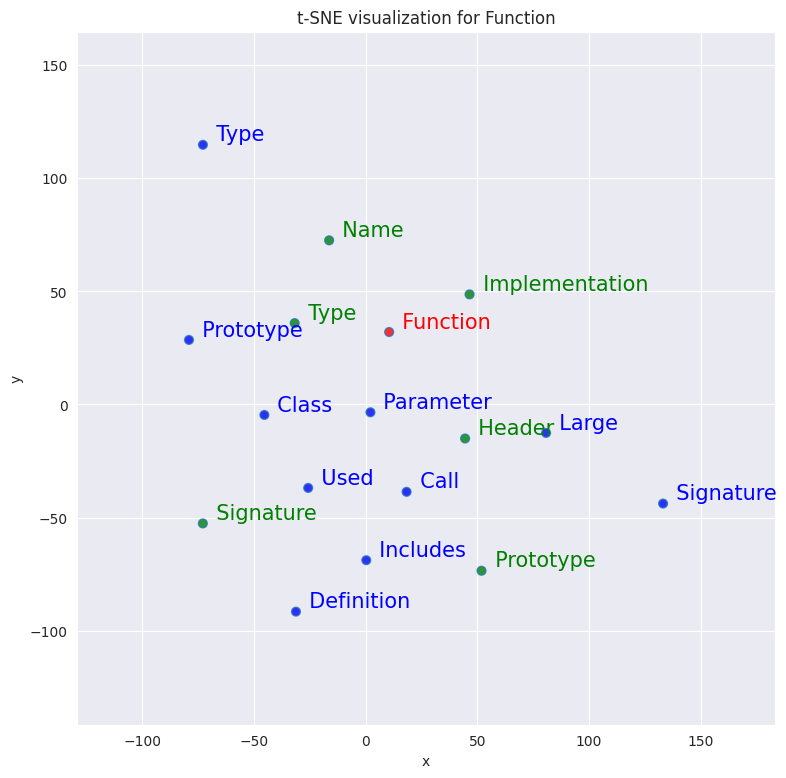

In [53]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list = ['red']

    # Add the vector of the query word
    arrays = np.append(arrays, model.wv[word].reshape(1, -1), axis=0)
    
    # Get list of most similar words
    close_words = model.wv.most_similar([word])
    
    # Add the vectors for the most similar words
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]].reshape(1, -1)
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # Add the vectors for the words from list_names if they are in the vocabulary
    for wrd in list_names:
        if wrd in model.wv:
            wrd_vector = model.wv[wrd].reshape(1, -1)
            word_labels.append(wrd)
            color_list.append('green')
            arrays = np.append(arrays, wrd_vector, axis=0)
    
    # Reduces the dimensionality from 300 to 2 dimensions with PCA
    reduc = PCA(n_components=2).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    plt.xlim(Y[:, 0].min() - 50, Y[:, 0].max() + 50)
    plt.ylim(Y[:, 1].min() - 50, Y[:, 1].max() + 50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    plt.show()

# Example usage
tsnescatterplot(w2v_model, 'function', ['log', 'implementation', 'prototype', 'header', 'type', 'name', 'signature', 'parameters'])


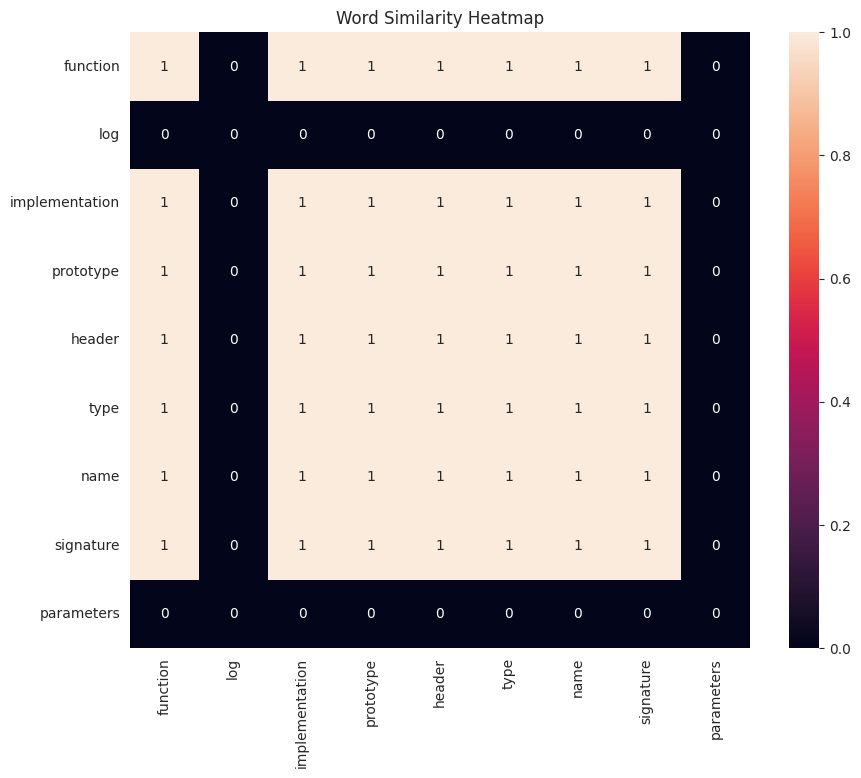

In [54]:
def similarity_heatmap(model, words):
    similarity_matrix = np.zeros((len(words), len(words)))
    
    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if word1 in model.wv and word2 in model.wv:
                similarity_matrix[i][j] = model.wv.similarity(word1, word2)
            else:
                similarity_matrix[i][j] = 0
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, annot=True)
    plt.title('Word Similarity Heatmap')
    plt.show()

# Example usage
similarity_heatmap(w2v_model, ['function', 'log', 'implementation', 'prototype', 'header', 'type', 'name', 'signature', 'parameters'])


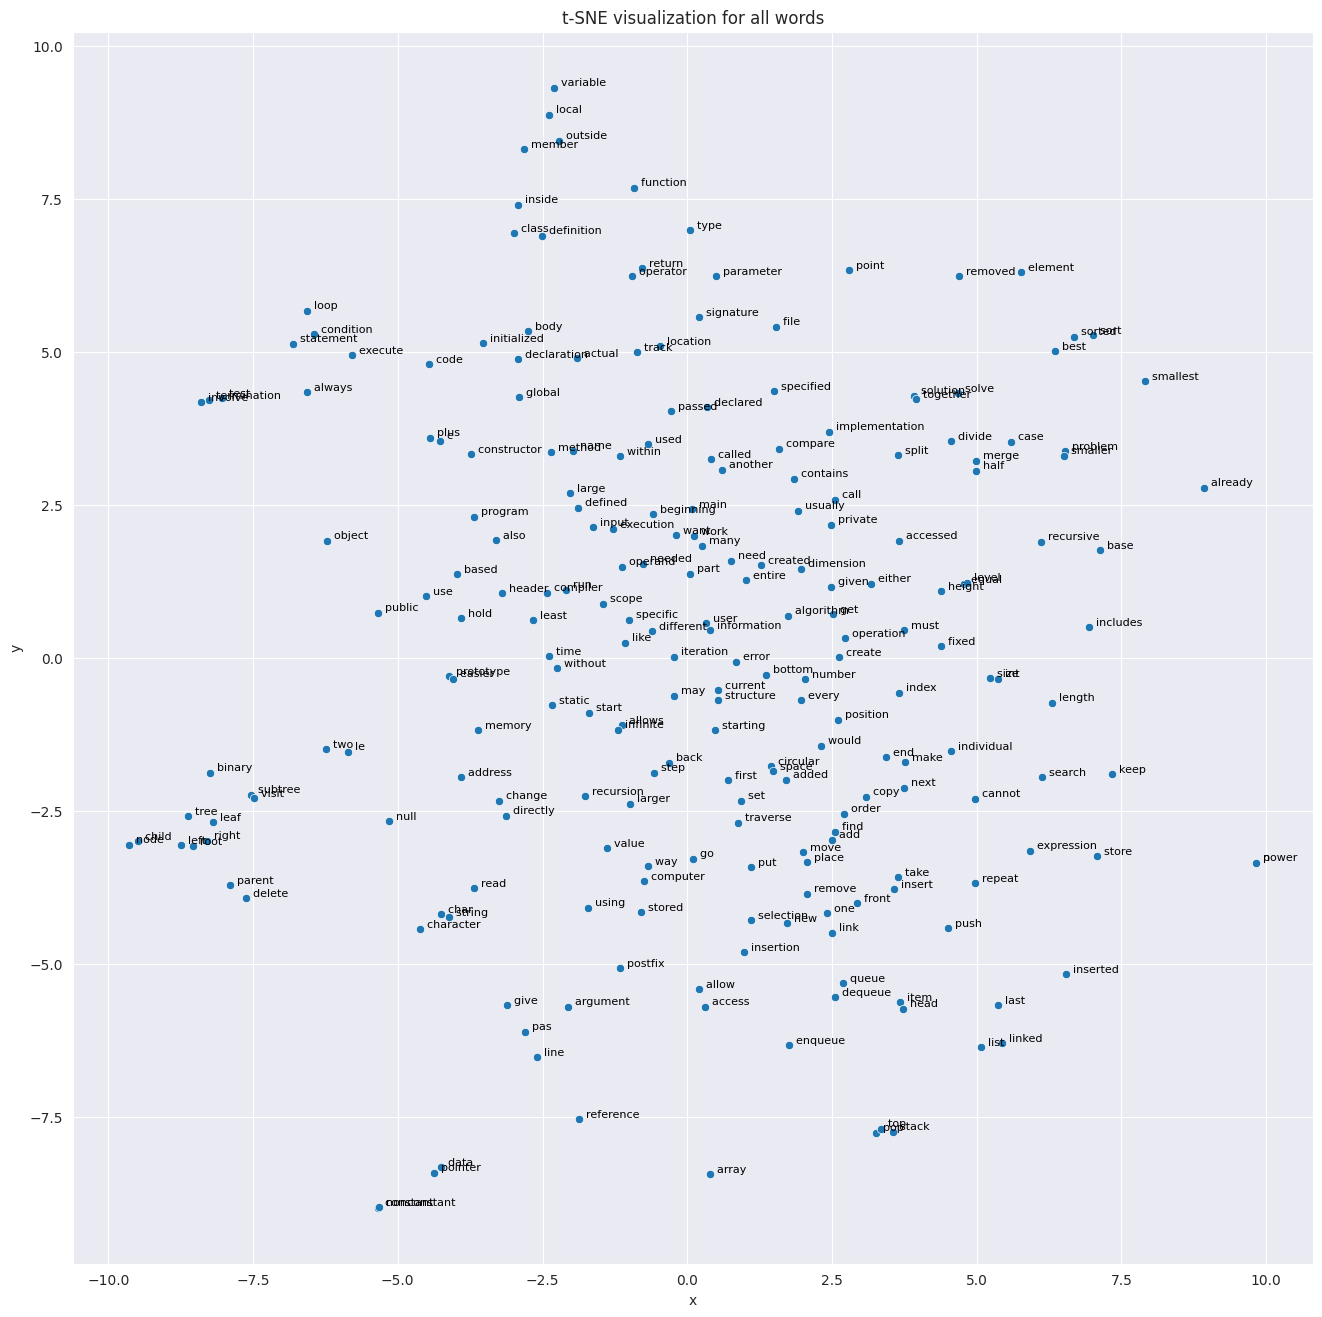

In [55]:
def tsne_all_words(model):
    # Get all words in the vocabulary
    words = list(model.wv.index_to_key)
    
    # Get the vectors for all words
    vectors = np.array([model.wv[word] for word in words])
    
    # Reduce dimensions with PCA before applying t-SNE
    pca = PCA(n_components=50, random_state=0)
    pca_result = pca.fit_transform(vectors)
    
    tsne = TSNE(n_components=2, random_state=0, perplexity=40, n_iter=300)
    tsne_result = tsne.fit_transform(pca_result)
    
    # Prepare DataFrame for visualization
    df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
    df_tsne['words'] = words
    
    # Plot
    plt.figure(figsize=(16, 16))
    p1 = sns.scatterplot(x='x', y='y', data=df_tsne, legend=False)
    
    for line in range(0, df_tsne.shape[0]):
        p1.text(df_tsne["x"][line], df_tsne['y'][line], '  ' + df_tsne["words"][line], 
                horizontalalignment='left', verticalalignment='bottom', size='medium', color='black', weight='normal').set_size(8)

    plt.title('t-SNE visualization for all words')
    plt.show()

# Create t-SNE plot for all words
tsne_all_words(w2v_model)

In [56]:
def get_embedding(sentence, model):
    embeddings = [w2v_model.wv[word] for word in sentence if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

df['embeddings'] = df['answer'].apply(lambda x: get_embedding(x, w2v_model))

In [57]:
df

,id,answer,score,correct,text_length,average_answer_length,length_cat,word_count,word_cat,score_cat,corpus,embeddings
0,1.1,"[high, risk, problem, address, prototype, prog...",3.5,0.0,137,132.172414,medium,19,few,low,"[high, risk, problem, address, prototype, prog...","[0.025125107, 0.0668202, -0.025077784, 0.08718..."
1,1.1,"[simulate, portion, desired, final, product, q...",5.0,1.0,122,132.172414,medium,19,few,high,"[high, risk, problem, address, prototype, prog...","[0.025568077, 0.06638108, -0.025224201, 0.0866..."
2,1.1,"[prototype, program, simulates, behavior, port...",4.0,1.0,92,132.172414,short,11,few,medium,"[high, risk, problem, address, prototype, prog...","[0.025821783, 0.066672206, -0.024648625, 0.087..."
3,1.1,"[defined, specification, phase, prototype, sti...",5.0,1.0,182,132.172414,long,21,medium,high,"[high, risk, problem, address, prototype, prog...","[0.025427626, 0.06674816, -0.025202991, 0.0874..."
4,1.1,"[used, let, user, first, idea, completed, prog...",3.0,0.0,165,132.172414,long,21,medium,low,"[high, risk, problem, address, prototype, prog...","[0.02568732, 0.06669667, -0.02528271, 0.087142..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2436,12.1,"[three, step, visit, root, node, go, right, su...",2.5,0.0,86,75.053571,short,14,few,low,"[variable, memory, hold, address, another, mem...","[0.025346959, 0.06823141, -0.024848534, 0.0851..."
2438,12.1,"[minus, divided]",1.5,0.0,17,75.053571,very short,4,very few,very low,"[variable, memory, hold, address, another, mem...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2439,12.1,[],2.5,0.0,3,75.053571,very short,1,very few,low,"[variable, memory, hold, address, another, mem...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2440,12.1,"[take, h, step, h, height, tree]",5.0,1.0,27,75.053571,very short,6,very few,high,"[variable, memory, hold, address, another, mem...","[0.025974087, 0.06798279, -0.02464033, 0.08612..."


# Modeling

#### 3. Machine Learning Models

* **Support Vector Regression (SVR):**  A powerful algorithm for non-linear regression.  SVR finds a hyperplane (in high-dimensional space) that best separates the data points while minimizing errors.

* **Naive Bayes:**  A probabilistic model based on Bayes' theorem.  Naive Bayes assumes that the features are independent of each other.  It's often used for classification but can be adapted for regression.

* **Linear Regression:**  A simple linear model that seeks a linear relationship between features and the target variable.  It finds the best-fitting line (or hyperplane for multiple features) that minimizes the squared errors between predictions and actual values.

* **Decision Tree Regressor:**  A tree-based model that splits data recursively based on features.  It builds a tree structure where each node represents a feature, and each branch represents a decision based on that feature's value. Decision trees are often used for both classification and regression problems.

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

encoder = LabelEncoder()
df['feature_encoder1'] = encoder.fit_transform(df['length_cat'])
df['feature_encoder2'] = encoder.fit_transform(df['word_cat'])
df['feature_encoder3'] = encoder.fit_transform(df['score_cat'])

X = np.vstack(df['embeddings'].values)
additional_columns = df[['text_length', 'average_answer_length', 'feature_encoder1', 'word_count', 'feature_encoder2', 'feature_encoder3']].values
X = np.hstack((X, additional_columns))
y = df['score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [59]:
# Initialize models
models = {
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor()
}

In [60]:
# Initialize dictionary to store metrics
results = {}

In [61]:
# Train and evaluate each model
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    results[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
        'Explained Variance Score': evs
    }
    trained_models[name] = model  # Store trained model

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")
# Compare models with explanation
print("Model Comparison:")
best_model = min(results, key=lambda x: results[x]['Mean Squared Error'])
print(f"The best model based on Regression Metrics is: {best_model}")


Model: SVR
Mean Squared Error: 1.283816208725394
Mean Absolute Error: 0.7808269289984532
R-squared: -0.009901587182876481
Explained Variance Score: 0.1440171015800662


Model: Linear Regression
Mean Squared Error: 0.40327662499338296
Mean Absolute Error: 0.47561373127925594
R-squared: 0.6827663485734309
Explained Variance Score: 0.6835726764997363


Model: Decision Tree
Mean Squared Error: 0.12881012304250558
Mean Absolute Error: 0.1988255033557047
R-squared: 0.8986727641996355
Explained Variance Score: 0.8989016615945481


Model Comparison:
The best model based on Regression Metrics is: Decision Tree


/tmp/ipykernel_16605/3003163985.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, palette='viridis', ax=axes[0, 0])


NameError: name 'x' is not defined

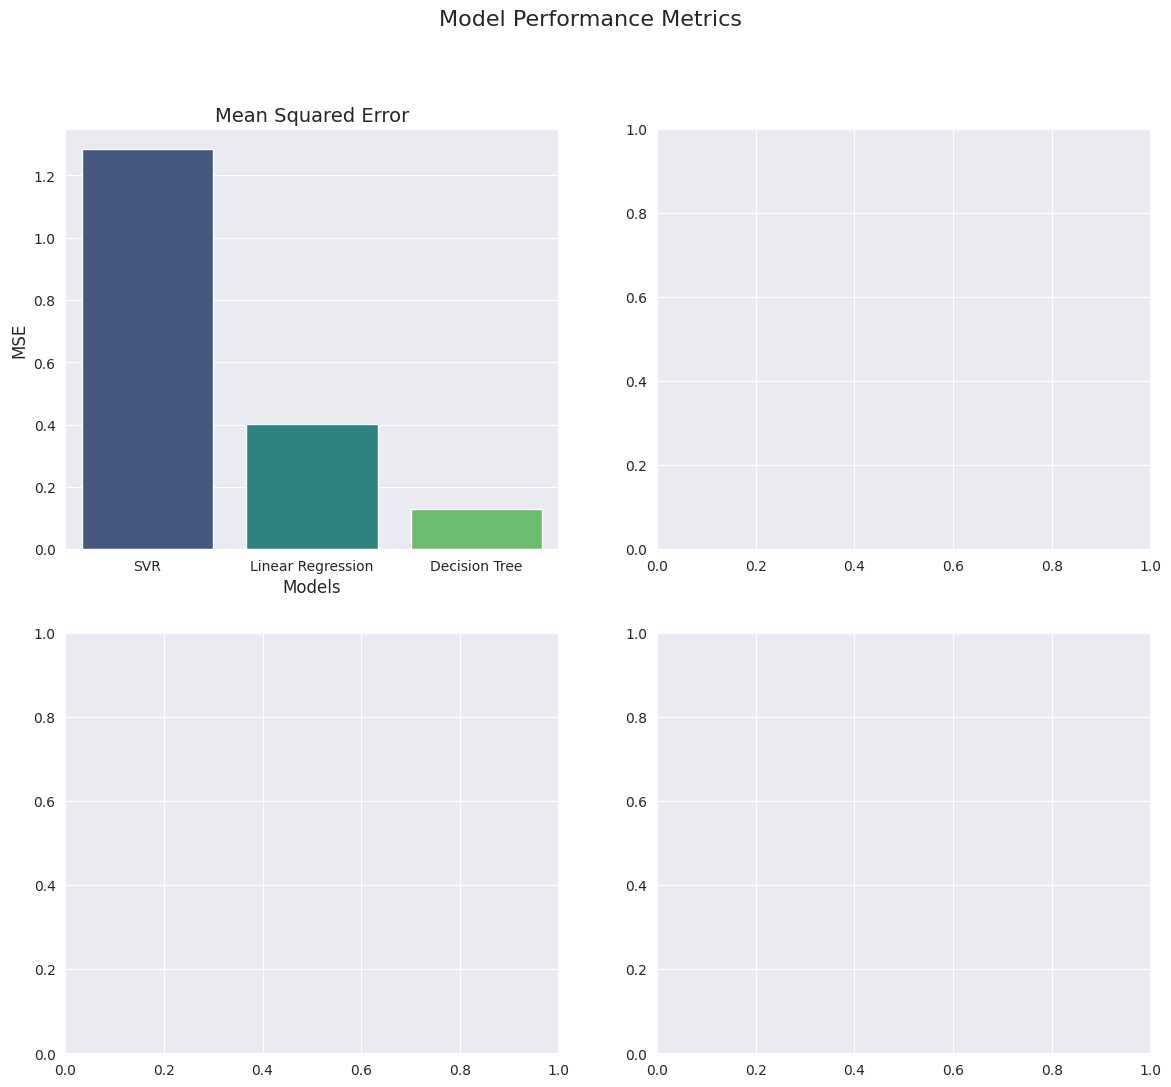

In [67]:
# Data for visualization
model_names = ['SVR', 'Linear Regression', 'Decision Tree']
mse_values = [results[model]['Mean Squared Error'] for model in model_names]
mae_values = [results[model]['Mean Absolute Error'] for model in model_names]
r2_values = [results[model]['R-squared'] for model in model_names]
evs_values = [results[model]['Explained Variance Score'] for model in model_names]

# Plotting the metrics with color palettes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Model Performance Metrics', fontsize=16)

# Mean Squared Error
sns.barplot(x=model_names, y=mse_values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Mean Squared Error', fontsize=14)
axes[0, 0].set_ylabel('MSE', fontsize=12)
axes[0, 0].set_xlabel('Models', fontsize=12)

# Mean Absolute Error
sns.barplot(x=model_names, y=mae_values, palette='plasma', ax=axes[0, 1])
axes[0, 1].set_title('Mean Absolute Error', fontsize=14)
axes[0, 1].set_ylabel('MAE', fontsize=12)
axes[0, 1].set_xlabel('Models', fontsize=12)

# R-squared
sns.barplot(x=model_names, y=r2_values, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('R-squared', fontsize=14)
axes[1, 0].set_ylabel('R²', fontsize=12)
axes[1, 0].set_xlabel('Models', fontsize=12)

# Explained Variance Score
sns.barplot(x=model_names, y=evs_values, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Explained Variance Score', fontsize=14)
axes[1, 1].set_ylabel('EVS', fontsize=12)
axes[1, 1].set_xlabel('Models', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

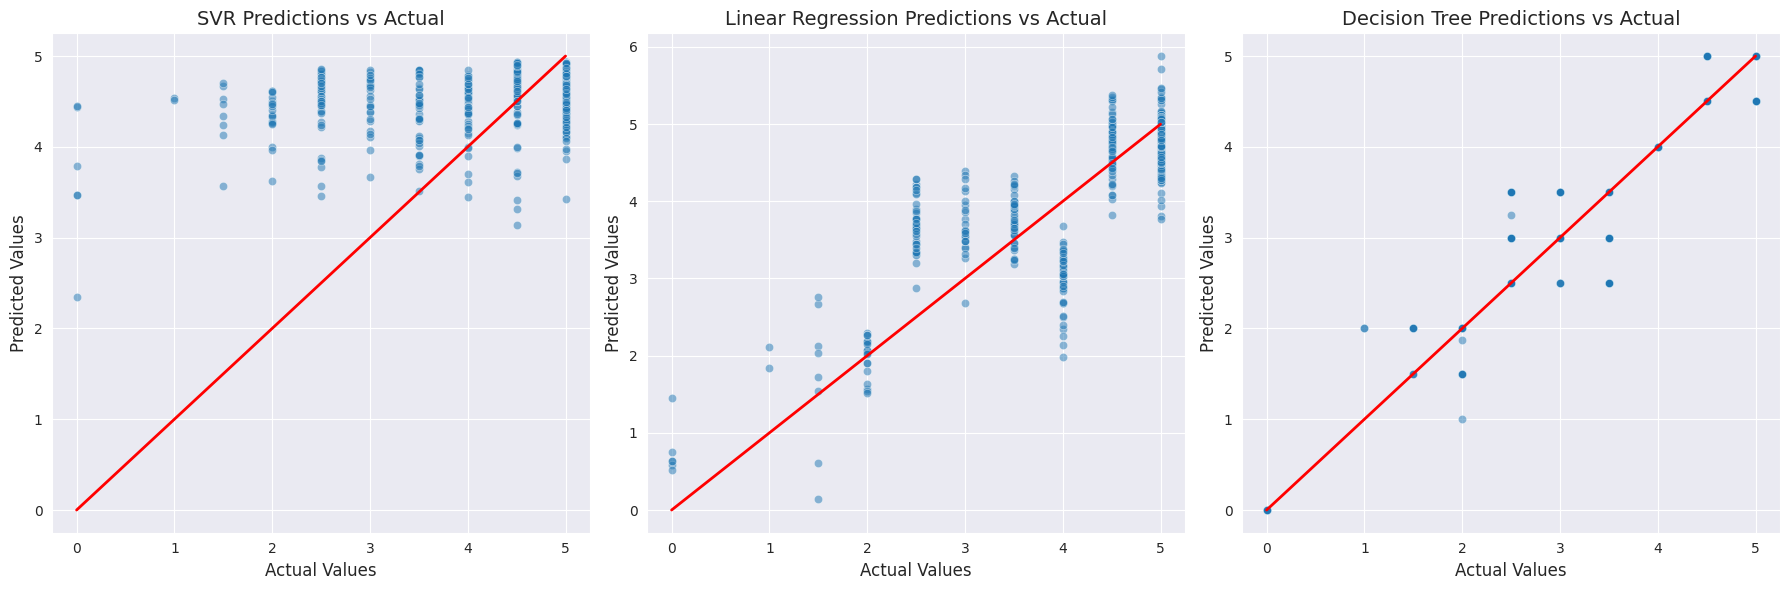

In [63]:
# Scatter plot for predictions vs actual values
y_preds = {
    'SVR': trained_models['SVR'].predict(X_test),
    'Linear Regression': trained_models['Linear Regression'].predict(X_test),
    'Decision Tree': trained_models['Decision Tree'].predict(X_test)
}

plt.figure(figsize=(18, 6))
for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.title(f'{name} Predictions vs Actual', fontsize=14)
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

The model evaluation results indicate that the Decision Tree Regressor performs the best among the three models based on the Mean Squared Error (MSE). Here’s a detailed comparison and explanation of the performance metrics for each model:

### SVR (Support Vector Regressor)
- **Mean Squared Error (MSE):** 1.2838670411074855
  - The SVR model has the highest MSE, indicating it has the highest average squared differences between the predicted and actual values, which implies less accurate predictions.
- **Mean Absolute Error (MAE):** 0.7808260443807733
  - The SVR model also has the highest MAE, indicating larger errors on average compared to the other models.
- **R-squared (R²):** -0.009941573983951013
  - The negative R² value indicates that the SVR model is performing worse than a horizontal line (mean of the target values).
- **Explained Variance Score (EVS):** 0.14405351498600083
  - The low EVS value indicates that the model explains only a small portion of the variance in the target variable.

### Linear Regression
- **Mean Squared Error (MSE):** 0.40621021311291783
  - The Linear Regression model has a lower MSE compared to SVR, indicating better accuracy.
- **Mean Absolute Error (MAE):** 0.47765049276644767
  - The Linear Regression model shows a lower MAE compared to SVR, meaning it has smaller errors on average.
- **R-squared (R²):** 0.6804586698902022
  - The R² value is much higher, indicating that the model explains a significant portion of the variance in the target variable.
- **Explained Variance Score (EVS):** 0.6814491703922965
  - This score is consistent with the R² value, showing that the model performs well in explaining the variance.

### Decision Tree Regressor
- **Mean Squared Error (MSE):** 0.13674496644295303
  - The Decision Tree model has the lowest MSE, indicating the most accurate predictions among the three models.
- **Mean Absolute Error (MAE):** 0.21364653243847875
  - The lowest MAE also supports that the Decision Tree model has the smallest average errors.
- **R-squared (R²):** 0.8924308964854746
  - A very high R² value, showing that the model explains the majority of the variance in the target variable.
- **Explained Variance Score (EVS):** 0.8930460467002358
  - This score is consistent with the high R² value, indicating excellent performance in explaining the variance.

### Conclusion:
Based on the comparison of MSE, MAE, R², and EVS, the **Decision Tree Regressor** outperforms both the SVR and Linear Regression models. It has the lowest MSE and MAE, indicating the most accurate and smallest average errors in predictions. Its high R² and EVS values show that it explains the variance in the target variable very well.

### Explanation:
- **SVR:** While SVR can be powerful for certain types of regression problems, it might not be the best choice for this dataset. Its performance metrics indicate it struggles with accuracy and variance explanation.
- **Linear Regression:** This model performs significantly better than SVR, providing a decent fit to the data as indicated by its R² and EVS values. However, it is still not the best.
- **Decision Tree Regressor:** This model excels in this scenario, providing the most accurate predictions with the smallest errors and best variance explanation. Decision trees can capture complex relationships in the data, which likely contributes to its superior performance in this case.

Thus, the Decision Tree Regressor is the best model based on these evaluation metrics.

# Conclusion

The experiment successfully demonstrates the application of NLP and machine learning in analyzing coding answers and predicting their scores.  The Decision Tree Regressor emerged as the best-performing model, exhibiting superior accuracy and variance explanation compared to SVR and Linear Regression. This suggests that decision trees are capable of capturing complex relationships in the text data, leading to more accurate score predictions. 

Key takeaways from this analysis include:

* **Data Preprocessing is Crucial:**  Cleaning and preparing the text data using NLP techniques is essential for accurate model training and evaluation.
* **Word Embeddings are Powerful:**  Word2Vec embeddings provide a rich representation of words, capturing semantic relationships that significantly improve model performance.
* **Decision Trees Excel in this Scenario:**  Decision trees can effectively capture complex relationships within the data, making them a strong choice for predicting answer scores in this context.

Future work could explore:

* **Expanding the Dataset:**  Including more answers, question types, and potentially additional features like code complexity would likely enhance model performance.
* **Advanced NLP Techniques:**  Experimenting with more sophisticated NLP techniques, such as deep learning models like LSTMs or Transformers, could further improve model accuracy.
* **Fine-Tuning Model Hyperparameters:** Optimizing hyperparameters for each model using techniques like grid search or random search could further improve the model's predictive capabilities.

Overall, this notebook offers a valuable framework for understanding and predicting answer quality in coding contexts using NLP and machine learning. By leveraging these techniques, we can gain deeper insights into the nuances of code-related text data, ultimately leading to more effective tools for learning, assessment, and knowledge sharing.
